In [4]:
# !pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.5 MB 923 kB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.1
    Uninstalling pip-20.1:
      Successfully uninstalled pip-20.1


In [7]:
# !pip install opencv-python==3.4.2.16

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 25.0 MB 5.9 MB/s eta 0:00:011


In [8]:
# !pip install opencv-contrib-python==3.4.2.16

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 30.6 MB 134 kB/s  eta 0:00:01


In [11]:
import cv2
import numpy as np

In [10]:
cv2.__version__

'3.4.2'

In [13]:
!pip install cmake

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 18.2 MB 3.8 MB/s eta 0:00:01


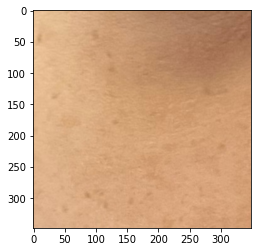

In [27]:
import cv2
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

# https://github.com/opencv/opencv/tree/master/data/haarcascades
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') #OpenCV 얼굴 인식
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')                  #OpenCV 눈 인식

img_file ='./06_F.jpg'
img = cv2.imread(img_file)                                                                          # 파일 불러오기
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)                                                        # GRAYSCALE로 변환

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

eyes_test_01=[]
eyes_test_02=[]
eyes_test_03=[]
eyes_test_04=[]
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),5)
    roi_gray = gray[y:y+int(h/2), x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        if int(w/ew) < 8:      #얼굴로 인식하는 길이 / 눈으로 인식하는 길이   보통 6~8 보다 낮음
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),5)
            eyes_test_01.append(ex)
            eyes_test_02.append(ew)
            eyes_test_03.append(ey)
            eyes_test_04.append(eh)
            
            
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
#plt.axis('off')
# plt.imshow(img)
# plt.show()

img_test_01 = roi_color[eyes_test_03[0]+eyes_test_04[0]+5:eyes_test_03[0]+eyes_test_04[0]+eyes_test_04[0]+5,
                        eyes_test_01[0]:eyes_test_01[0]+eyes_test_02[0]]
img_test_01 = cv2.cvtColor(img_test_01, cv2.COLOR_RGB2BGR)
plt.imshow(img_test_01)

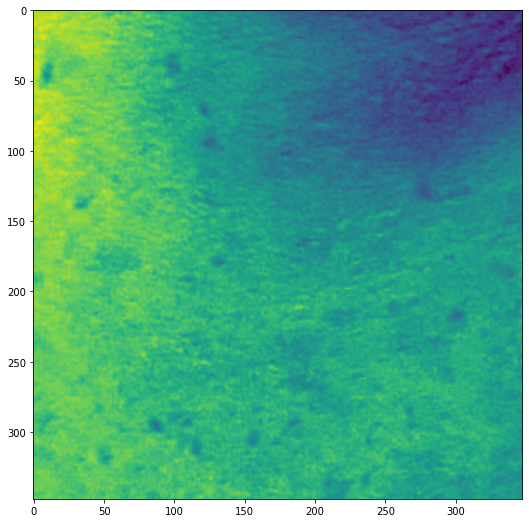

In [18]:
plt.figure(figsize=(9,9))
img_test_02 = cv2.cvtColor(img_test_01,cv2.COLOR_BGR2GRAY)
plt.imshow(img_test_02)

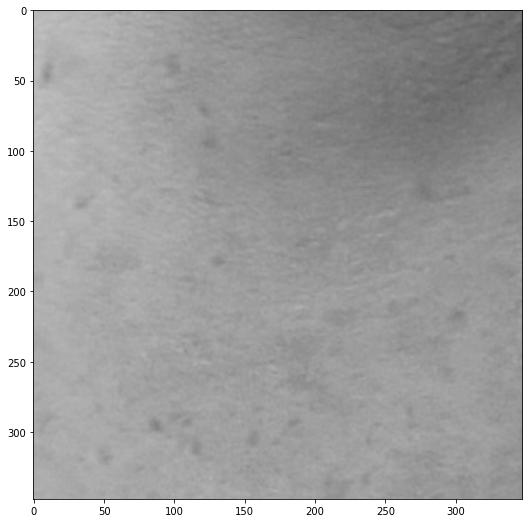

In [20]:
detector = cv2.SimpleBlobDetector_create()
keypoint = detector.detect(img_test_02)
blur_with_keypoints = cv2.drawKeypoints(img_test_02, keypoint, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(9,9))
plt.imshow(blur_with_keypoints)

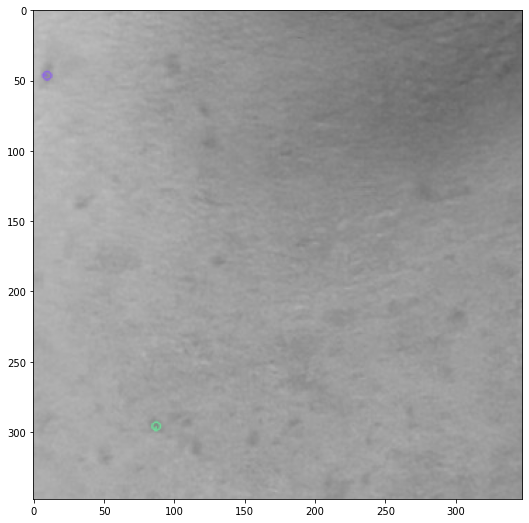

In [23]:
import cmake

gray = cv2.cvtColor(blur_with_keypoints, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)

img = cv2.drawKeypoints(gray, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(9,9))
plt.imshow(img)